<a href="https://colab.research.google.com/github/Shreyaswini-M-R/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Image Classification

In [1]:
# Import Libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# 1. Gather Data

# By Using Bing Image Downloader
!pip install bing-image-downloader

In [3]:
# Create a new folder
!mkdir images

In [4]:
# Download Images
from bing_image_downloader import downloader
downloader.download("blueberry fruit",limit=30,output_dir='images',adult_filter_off=True)
downloader.download("puma animal",limit=30,output_dir='images',adult_filter_off=True)
downloader.download("lotus flower",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://natashaskitchen.com/wp-content/uploads/2016/01/Blueberry-Pear-Smoothie-5.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/d8/af/49/d8af49320f3567cedbde44b75edd73c2--blueberry-violet.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.thecurvycarrot.com/wp-content/uploads/2011/07/IMG_2589.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/eb/33/1c/eb331c0951dae8bc0544b9616130c180--how-to-protect-blueberry-bushes-when-to-plant-blueberry-bushes.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://divnil.com/wallpaper/iphone5/img/app/f/o/food-fruits-green-grapes-cranberry-blueberry-strawberry-cherry-orange-blackberry-640x1136_f6ecb87ce7a87a72aed2e61a173ede7e_raw.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://homegardeners.in/wp-content/uploads/2017/08/Strawberries-1.jpg
[%] File Downlo

In [5]:
# 2. Preprocess Data

# Resizing and Flattening images
# Iterating through the images

from skimage.io import imread
from skimage.transform import resize

output = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['blueberry fruit','puma animal','lotus flower']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))     # Resizing the images
    flat_data.append(img_resized.flatten())         # Flattening the images
    images.append(img_resized)
    output.append(class_num)
flat_data = np.array(flat_data)
output = np.array(output)
images = np.array(images)

In [6]:
# Split data into Training and Texting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,output,test_size=0.5,random_state=50)

In [7]:
# 3. Algorithm

# Using GridSearchCV
# Using SVM Algorithm

from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
# 4. Evaluate Model

from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = clf.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7777777777777778
[[10  2  0]
 [ 3 13  0]
 [ 3  2 12]]


Enter your URLhttps://image.shutterstock.com/image-photo/puma-wild-cat-eyes-260nw-480454492.jpg
(280, 260, 3)
 PREDICTED OUTPUT: puma animal


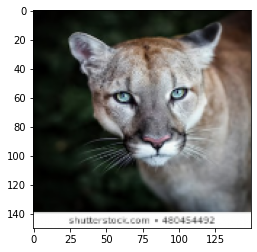

In [14]:
# 5. Predict for a new Image

import pickle
pickle.dump(clf,open('img_model.p','wb'))
model = pickle.load(open('img_model.p','rb'))

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')